In [2]:
# import python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r"D:\DA Interview\Introduction\archive\salaries.csv")

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,13972.000000,1.397200e+04,13972.000000,13972.000000
mean,2023.085600,1.660011e+05,150028.812124,33.334526
std,0.687612,3.661545e+05,68634.306349,46.682931
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.040000e+05,103000.000000,0.000000
50%,2023.000000,1.422000e+05,141600.000000,0.000000
75%,2024.000000,1.880000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           13972 non-null  int64 
 1   experience_level    13972 non-null  object
 2   employment_type     13972 non-null  object
 3   job_title           13972 non-null  object
 4   salary              13972 non-null  int64 
 5   salary_currency     13972 non-null  object
 6   salary_in_usd       13972 non-null  int64 
 7   employee_residence  13972 non-null  object
 8   remote_ratio        13972 non-null  int64 
 9   company_location    13972 non-null  object
 10  company_size        13972 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Exploratory Analysis and Visualization

#the dataset is divided based on Experience level as follows:

EN: Entry Level 
MI: Mid Level
SE: Senior Level
EX: Executive Level

#The dataset is divided based on Employment types as follows:


FT: Full Time
PT: Part Time
CT: Contract basis
FL: Freelancer

#The dataset is divided based on Company size as follows:


S: Small
M: Medium
L: Large

# Top 10 Job/Vacancies in a company

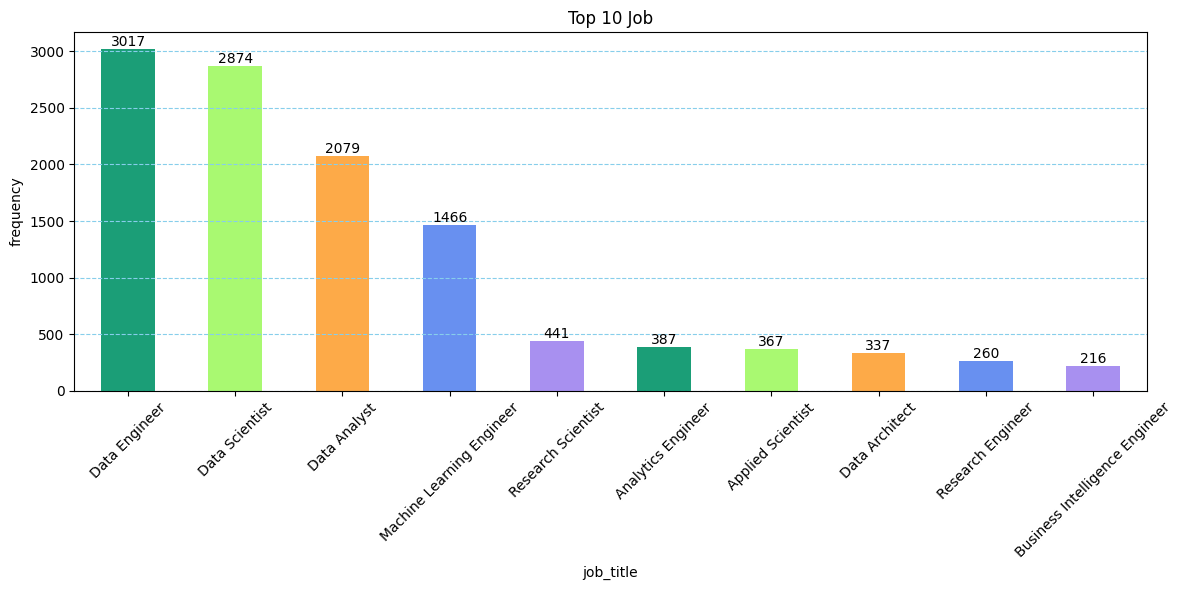

In [9]:
#count Job title 
vacancies = df['job_title'].value_counts().head(10)

#ploting the graph
plt.figure(figsize=(12,6))
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0'] 
vacancies.plot(kind='bar', color= colors)
plt.xlabel('job_title')
plt.ylabel('frequency')
plt.title('Top 10 Job')
plt.grid(axis= 'y',linestyle='--', color=('skyblue'))
plt.xticks(rotation=45)

# Adding values on each bar
for i, value in enumerate(vacancies):
    plt.text(i, value, str(value), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

:-Data Engineer, Data Scientist, and Data Analyst roles are in high demand.

# Distribution of Experience level

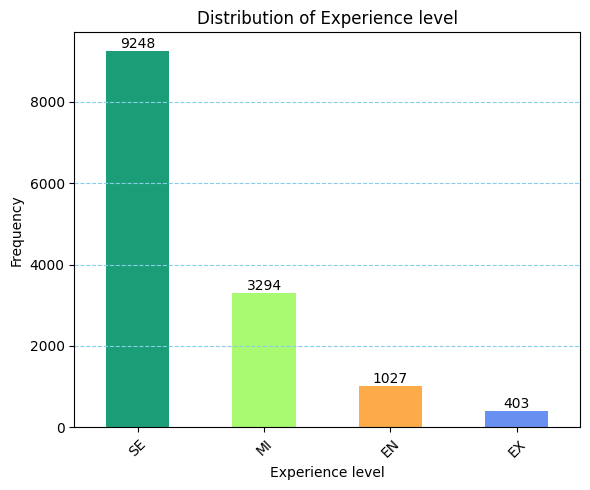

In [10]:
#count of experience_lavel
Experience_Distribution  = df['experience_level'].value_counts()

#Plotting the Graph
plt.figure(figsize=(6,5)) # figure size
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0'] #colors for bar
Experience_Distribution.plot(kind='bar',color=colors)
plt.title('Distribution of Experience level')
plt.xlabel('Experience level')
plt.ylabel('Frequency')
plt.xticks(rotation= 45) # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--',color='skyblue')

# Adding values on each bar
for i, value in enumerate(Experience_Distribution):
    plt.text(i, value, str(value), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

:-Senior Level is more demanding, followed by Mid Level requirements.

# Comparing salaries of Data scientist jobs based on Experience level

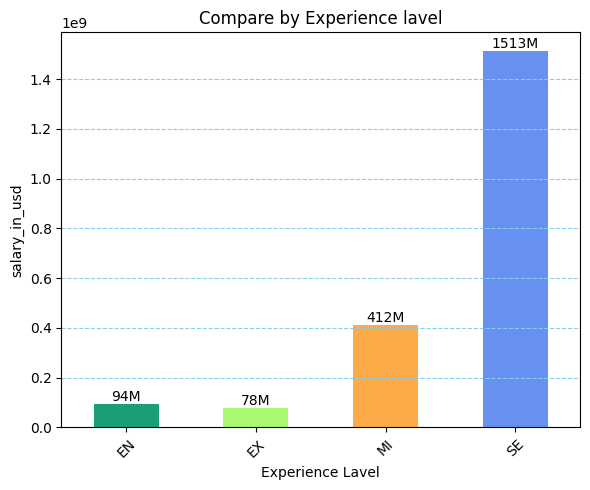

In [11]:
#Grouping the experience_lavel with respect to salary
compare_experience = df.groupby('experience_level')['salary_in_usd'].sum()

#Ploting the Graph 
plt.figure(figsize=(6,5)) 
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0'] 
compare_experience.plot(kind='bar',color= colors)
plt.xlabel('Experience Lavel')
plt.ylabel('salary_in_usd')
plt.title('Compare by Experience lavel')
plt.grid(axis= 'y', linestyle='--', color= 'skyblue')
plt.xticks(rotation= 45) 

# Adding values on each bar 
for i, value in enumerate(compare_experience):
    label = f"{value / 1000000:.0f}M"  # Divides the value by 1,000,000 and appends 'M'
    plt.text(i, value, label, ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

:-Senior-level positions typically offer higher salaries.

# Comparing salaries based on experience level and Size of company

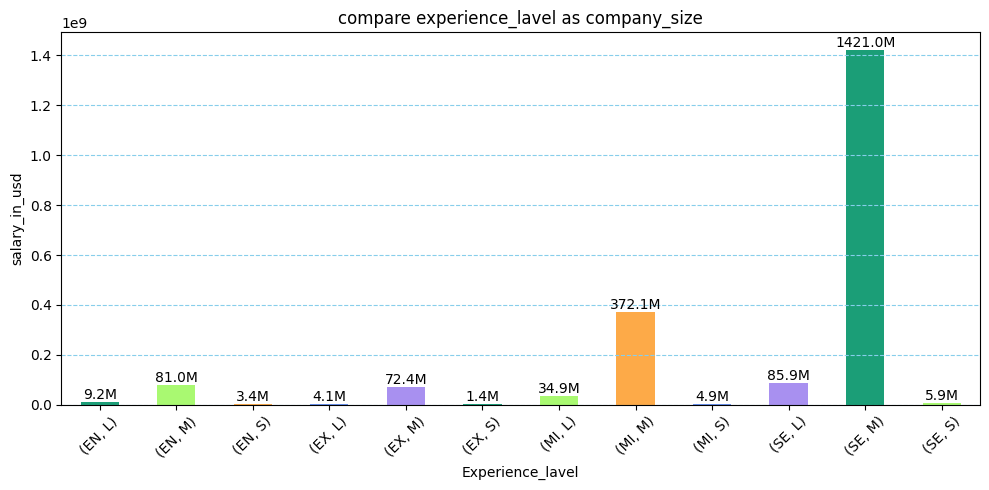

In [12]:
#Grouping experience level and Size of company with respect of salary
Compare_size = df.groupby(['experience_level', 'company_size'])['salary_in_usd'].sum()

#plotting the Graph
plt.figure(figsize=(10,5))
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0'] 
Compare_size.plot(kind='bar',color= colors)
plt.xlabel('Experience_lavel')
plt.ylabel('salary_in_usd')
plt.title('compare experience_lavel as company_size')
plt.grid(axis='y', linestyle='--', color='skyblue')
plt.xticks(rotation=45)

# Adding values on each bar 
for i, value in enumerate(Compare_size):
    label = f"{value / 1000000:.1f}M"  # Divides the value by 1,000,000 and appends 'M'
    plt.text(i, value, label, ha='center', va='bottom')
    
plt.tight_layout()
plt.show()


:-Senior and medium-level companies often offer higher salaries compared to entry-level or smaller organizations and bigger organizations

# Average salary as a function of currency

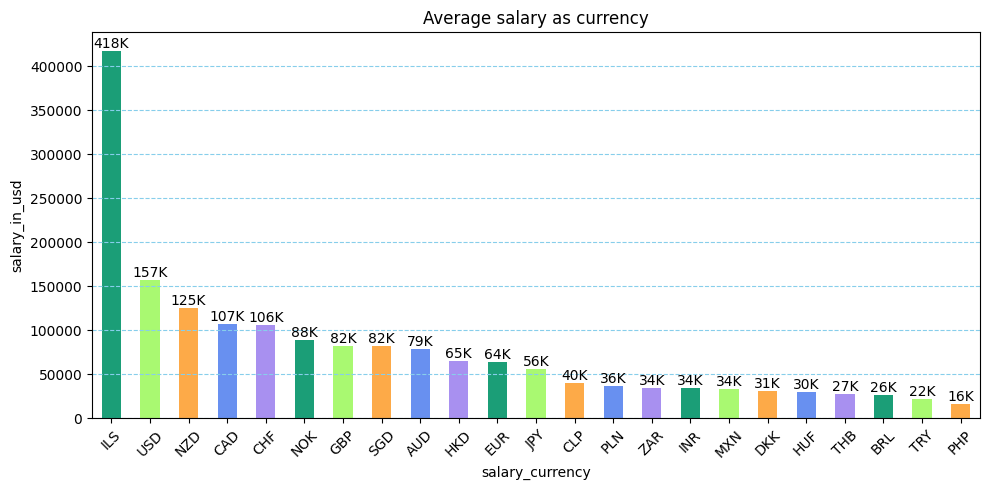

In [13]:
#grouping the currency with respect of salary
currency = df.groupby('salary_currency')['salary_in_usd'].mean().sort_values(ascending=False)

#ploting the Graph
plt.figure(figsize=(10,5))
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0'] 
currency.plot(kind='bar', color= colors)
plt.xlabel('salary_currency')
plt.ylabel('salary_in_usd')
plt.title('Average salary as currency')
plt.grid(axis= 'y',linestyle='--', color=('skyblue'))
plt.xticks(rotation=45)
# Adding values on each bar 
for i, value in enumerate(currency):
    label = f"{value / 1000:.0f}K"  # Divides the value by 1000 and appends 'K'
    plt.text(i, value, label, ha='center', va='bottom')

plt.tight_layout()
plt.show()

:-The top three countries for average salary are Israel (ILS), USA (USD), and New Zealand (NZD).

# Top 10 Data Science job positions

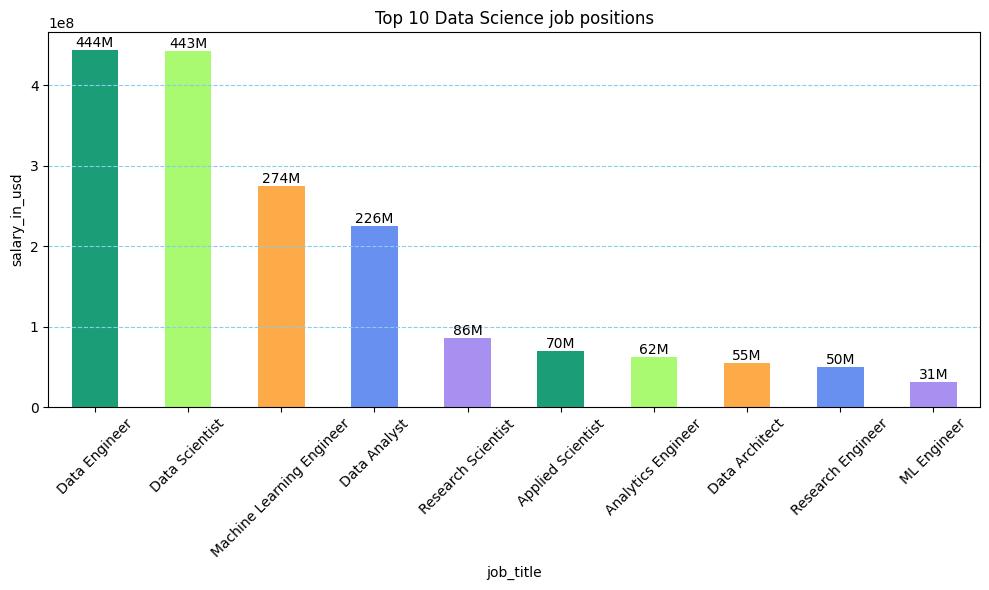

In [14]:
#grouping Job title with respect of salries
position = df.groupby('job_title')['salary_in_usd'].sum().sort_values(ascending=False).head(10)

#ploting the graph
plt.figure(figsize=(10,6))
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0'] 
position.plot(kind='bar', color= colors)
plt.xlabel('job_title')
plt.ylabel('salary_in_usd')
plt.title('Top 10 Data Science job positions')
plt.grid(axis= 'y',linestyle='--', color=('skyblue'))
plt.xticks(rotation=45)

# Adding values on each bar 
for i, value in enumerate(position):
    label = f"{value / 1_000_000:.0f}M"  # Divides the value by 1,000,000 and appends 'M'
    plt.text(i, value, label, ha='center', va='bottom')

plt.tight_layout()
plt.show()

:-Top 3 job titles with high salaries: Data Engineer, Data Scientist, Machine Learning Engineer, based on compensation data.

# Remote work status as function of time

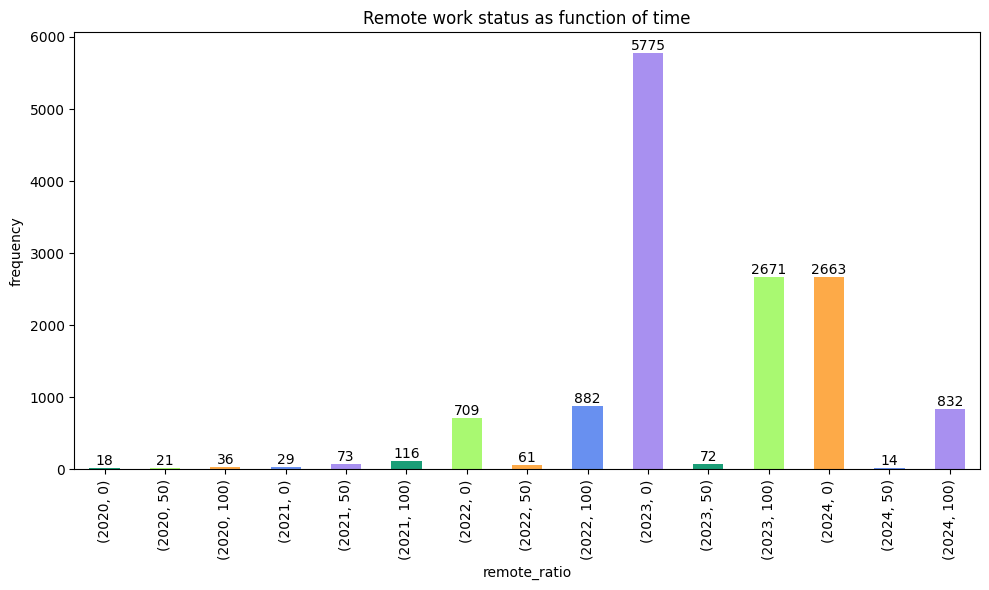

In [16]:
#define remote work as per year 
Remote_work = df.groupby(['work_year','remote_ratio'])['remote_ratio'].value_counts()

#ploting the Graph
plt.figure(figsize=(10,6))
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0'] #colors for bar
Remote_work.plot(kind='bar', color= colors)
plt.xlabel('remote_ratio')
plt.ylabel('frequency')
plt.title('Remote work status as function of time')

# Adding values on each bar
for i, value in enumerate(Remote_work):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Comparing top 5 Data scientist salaries across the world

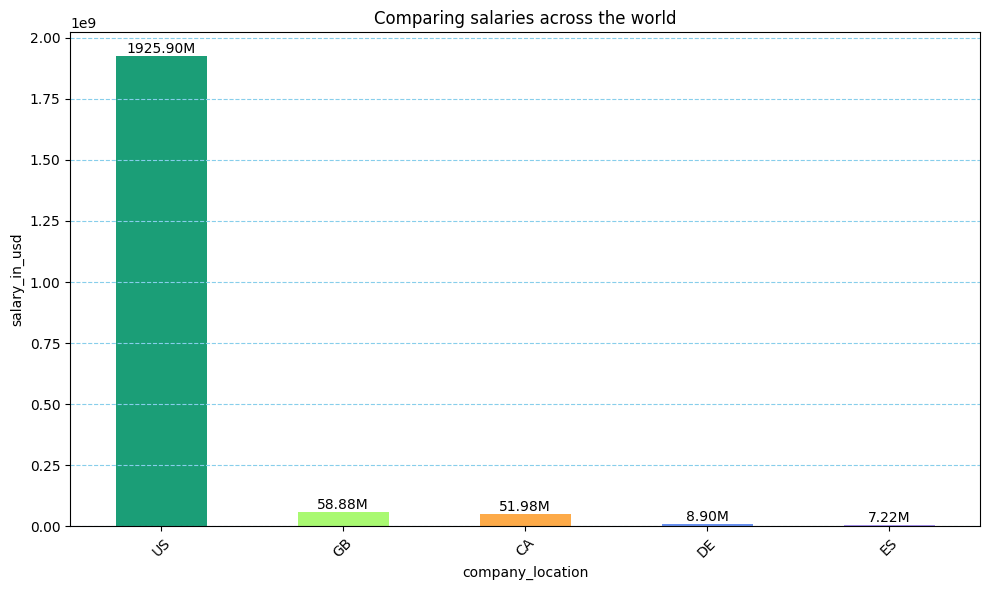

In [18]:
#group the Location of company with respect of salaries
Compare_world = df.groupby('company_location')['salary_in_usd'].sum().sort_values(ascending=False).head(5)

#plotting the Graph
plt.figure(figsize=(10,6))
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0'] 
Compare_world.plot(kind='bar', color= colors)
plt.xlabel('company_location')
plt.ylabel('salary_in_usd')
plt.title('Comparing salaries across the world')
plt.grid(axis= 'y',linestyle='--', color=('skyblue'))
plt.xticks(rotation=45)

# Adding values on each bar 
for i, value in enumerate(Compare_world):
    label = f"{value / 1000000:.2f}M"  # Divides the value by 1,000,000 and appends 'M'
    plt.text(i, value, label, ha='center', va='bottom')

plt.tight_layout()
plt.show()

:- top 3 location based salaries US:United States, GB:Great Britain, CA:Canada

# Average Salary as a function of location








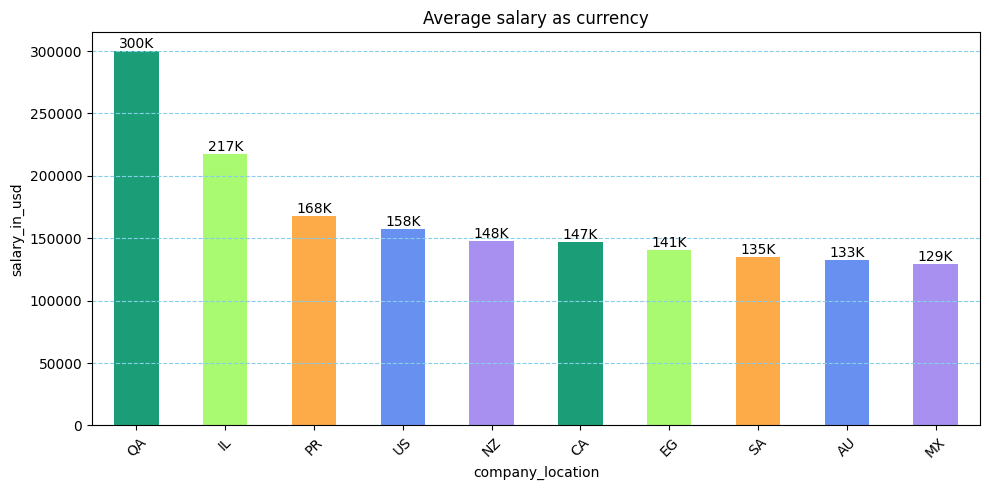

In [24]:
#grouping the currency with respect of salary
location = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

#ploting the Graph
plt.figure(figsize=(10,5))
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0'] 
location.plot(kind='bar', color= colors)
plt.xlabel('company_location')
plt.ylabel('salary_in_usd')
plt.title('Average salary as currency')
plt.grid(axis= 'y',linestyle='--', color=('skyblue'))
plt.xticks(rotation=45)
# Adding values on each bar 
for i, value in enumerate(location):
    label = f"{value / 1000:.0f}K"  # Divides the value by 1000 and appends 'K'
    plt.text(i, value, label, ha='center', va='bottom')

plt.tight_layout()
plt.show()

:- top 3 average salary based on location QA:Qatar, IL:Israel, PR:Puerto Rico

# Conclusion
In conclusion, the Data Science Job Salaries Dataset offers significant insights into the employment landscape for data science experts. Analysis of this dataset has revealed important patterns and trends, illuminating aspects such as salary variations, job titles, required experience levels, and the skills most in demand within the sector.
The variation of salaries as you gain experience is a rising curve.
